In [1]:
import pandas as pd 
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

# Fix cwd if necessary
while 'src' in os.getcwd():
    os.chdir('..')
print(f'Current working directory: {os.getcwd()}')

# Set the random seed for reproducibility
np.random.seed(1234)

# Set the style of the plots
markers = ['o', 's', 'D', 'v', 'p', 'P', 'X', 'h', 'H', 'd']
colors_discrete = sns.color_palette('tab10')
colors_continuous = sns.color_palette('viridis')
linestyles = ['-', '--', '-.', ':']

# Do not hide any columns
pd.set_option('display.max_columns', None)
sns.set_theme(style='whitegrid', font_scale=1)

Current working directory: /home/ignacy/research/betaRCE


In [2]:
results_path = 'results_lgbm'
images_dir = f'{results_path}/images'

os.makedirs(images_dir, exist_ok=True)

In [3]:
# raw_df = process_results(results_path)
raw_df = pd.read_feather(f'{results_path}/main_results.feather')

In [4]:
raw_df = raw_df.dropna()

In [5]:
raw_df.head(3)

,base_cf_method,model_type_to_use,experiment_type,dataset_name,k_mlps_in_B,fold_i,experiment_generalization_type,beta_confidence,delta_robustness,model2_name,x_test_sample,y_test_sample,model1_pred_proba,model1_pred_crisp,model2_pred_proba,model2_pred_crisp,base_counterfactual,base_counterfactual_model1_pred_proba,base_counterfactual_model1_pred_crisp,base_counterfactual_model2_pred_proba,base_counterfactual_model2_pred_crisp,base_counterfactual_validity,base_counterfactual_proximityL1,base_counterfactual_proximityL2,base_counterfactual_plausibility,base_counterfactual_discriminative_power,base_counterfactual_validity_model2,base_counterfactual_time,robust_counterfactual,robust_counterfactual_model1_pred_proba,robust_counterfactual_model1_pred_crisp,robust_counterfactual_model2_pred_proba,robust_counterfactual_model2_pred_crisp,robust_counterfactual_validity,robust_counterfactual_proximityL1,robust_counterfactual_proximityL2,robust_counterfactual_plausibility,robust_counterfactual_discriminative_power,robust_counterfactual_validity_model2,robust_counterfactual_L1_distance_from_base_cf,robust_counterfactual_L2_distance_from_base_cf,robust_counterfactual_time,start_sample_passes_test,counterfactual_does_not_pass_test,counterfactual_does_not_have_target_class,counterfactual_is_nan,highest_delta,lower_bound_beta,upper_bound_beta,base_model
0,GrowingSpheres,lightgbm,Bootstrap,wine_quality,32,0,Bootstrap,0.95,0.8,Model2_1,"[0.5338983050847457, 0.15333333333333332, 0.26...",1,0.588835,1,0.512219,1,"[0.5252803054236055, 0.15192354749322998, 0.26...",0.497927,0,0.544190,1,1,0.033662,0.013236,0.144411,0.466667,0,0.001736,"[0.5036050414012239, 0.21119101856984876, 0.29...",0.307680,0.0,0.290731,0.0,1.0,0.318858,0.108785,0.154611,0.600000,1.0,0.302007,0.011258,4.438094,0,0,0,0,0.925072,0.925072,0.999985,NeuralNetwork
1,GrowingSpheres,lightgbm,Bootstrap,wine_quality,32,0,Bootstrap,0.95,0.8,Model2_2,"[0.5338983050847457, 0.15333333333333332, 0.26...",1,0.588835,1,0.573192,1,"[0.5252803054236055, 0.15192354749322998, 0.26...",0.497927,0,0.488811,0,1,0.033662,0.013236,0.144411,0.466667,1,0.001736,"[0.5417682235816669, 0.1661230851973051, 0.288...",0.349096,0.0,0.298966,0.0,1.0,0.228859,0.083216,0.158765,0.733333,1.0,0.247842,0.007616,2.267080,0,0,0,0,0.863086,0.863086,0.996607,NeuralNetwork
2,GrowingSpheres,lightgbm,Bootstrap,wine_quality,32,0,Bootstrap,0.95,0.8,Model2_3,"[0.5338983050847457, 0.15333333333333332, 0.26...",1,0.588835,1,0.493817,0,"[0.5252803054236055, 0.15192354749322998, 0.26...",0.497927,0,0.459012,0,1,0.033662,0.013236,0.144411,0.466667,1,0.001736,"[0.5249462692430694, 0.17354116454582344, 0.24...",0.342888,0.0,0.257635,0.0,1.0,0.231574,0.080184,0.164183,0.600000,1.0,0.222014,0.006485,2.256706,0,0,0,0,0.925072,0.925072,0.999985,NeuralNetwork


In [6]:
raw_df['dataset_name'].value_counts()

wine_quality     27000
diabetes         27000
breast_cancer    19203
fico             18155
Name: dataset_name, dtype: int64

In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91358 entries, 0 to 91505
Data columns (total 50 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   base_cf_method                                  91358 non-null  object 
 1   model_type_to_use                               91358 non-null  object 
 2   experiment_type                                 91358 non-null  object 
 3   dataset_name                                    91358 non-null  object 
 4   k_mlps_in_B                                     91358 non-null  int64  
 5   fold_i                                          91358 non-null  int64  
 6   experiment_generalization_type                  91358 non-null  object 
 7   beta_confidence                                 91358 non-null  float64
 8   delta_robustness                                91358 non-null  float64
 9   model2_name                            

In [8]:
raw_df['base_model'].value_counts()

NeuralNetwork    91358
Name: base_model, dtype: int64

In [9]:
raw_df['base_cf_method'].value_counts()

GrowingSpheres    91358
Name: base_cf_method, dtype: int64

In [10]:
nn_gs_df = raw_df[(raw_df['base_model'] == 'NeuralNetwork') & (raw_df['base_cf_method'] == 'GrowingSpheres')]
nn_dice_df = raw_df[(raw_df['base_model'] == 'NeuralNetwork') & (raw_df['base_cf_method'] == 'Dice')]
nn_df = raw_df[raw_df['base_model'] == 'NeuralNetwork']
dt_gs_df = raw_df[(raw_df['base_model'] == 'DecisionTree') & (raw_df['base_cf_method'] == 'GrowingSpheres')]
dt_dice_df = raw_df[(raw_df['base_model'] == 'DecisionTree') & (raw_df['base_cf_method'] == 'Dice')]
dt_df = raw_df[raw_df['base_model'] == 'DecisionTree']

print(f'Lengths of the dataframes: NN GS: {len(nn_gs_df)}, NN Dice: {len(nn_dice_df)}, DT GS: {len(dt_gs_df)}, DT Dice: {len(dt_dice_df)}')

Lengths of the dataframes: NN GS: 91358, NN Dice: 0, DT GS: 0, DT Dice: 0


<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[1] Does higher Beta lead to better empirical robustness?</div>

32    91358
Name: k_mlps_in_B, dtype: int64


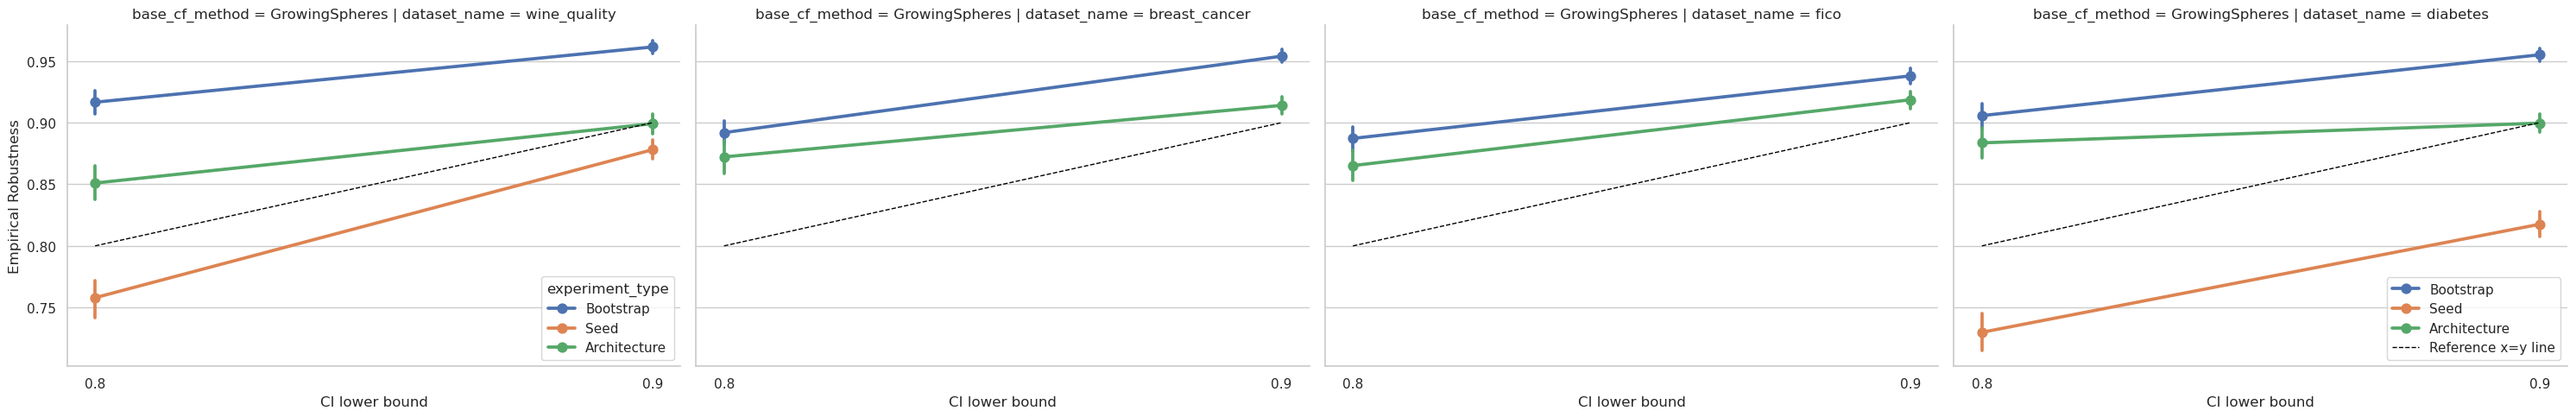

In [11]:
# Split by expeirment type (hue) and dataset (col)
# x-axis: lower bound discretized
# y-axis: average empirical robustness

_tmp_df = nn_df.copy()
lb_threshs = [0.8, 0.9, 1.0]
_tmp_df['CI lower bound'] = pd.cut(_tmp_df['lower_bound_beta'], bins=lb_threshs, labels=lb_threshs[:-1])
_tmp_df['CI midpoint'] = (_tmp_df['lower_bound_beta'] + _tmp_df['upper_bound_beta']) / 2
_tmp_df['CI midpoint'] = pd.cut(_tmp_df['CI midpoint'], bins=lb_threshs, labels=lb_threshs[:-1])
_tmp_df['Empirical Robustness'] = _tmp_df['robust_counterfactual_validity_model2'].astype(float)

# Print counts for each k_mlps_in_B
print(_tmp_df['k_mlps_in_B'].value_counts())

g = sns.catplot(data=_tmp_df, 
            x='CI lower bound',
            y='Empirical Robustness',
            hue='experiment_type', 
            col='dataset_name', 
            row='base_cf_method',
            kind='point', 
            # palette=colors_discrete, 
            # markers=markers, 
            height=5, 
            aspect=1.5,
            legend_out=False,
)
for ax in g.axes.flat:
    ax.plot(list(range(len(lb_threshs)-1)), lb_threshs[:-1], color='black', linestyle='--', linewidth=1, label='Reference x=y line')

plt.legend()
plt.savefig(f'{images_dir}/1_robustness_vs_ci_lower_bound.png', dpi=300, bbox_inches='tight')

<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[2] Is the empirical validity δ-Robust?</div>

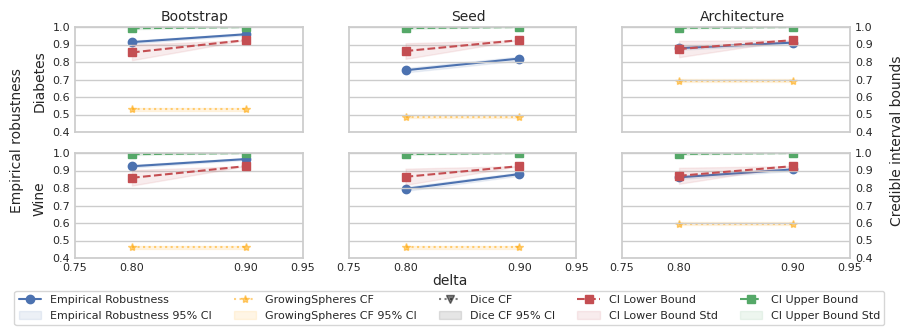

In [12]:
# Use only matplotlib 
# x-axis: delta_robsutness
# y-axis: empirical robustness
# twin y-axis: CI lower and upper bounds
# row: dataset
# col: experiment type

_tmp_df = nn_df.copy()
method='GrowingSpheres'

# datasets = ['wine_quality', 'diabetes', 'fico', 'breast_cancer']
# rename_Datasets = ['Wine', 'Diabetes', 'Heloc', 'Br. Cancer']

datasets = ['diabetes', 'wine_quality']
rename_Datasets = ['Diabetes', 'Wine']
_tmp_df['dataset_name'] = _tmp_df['dataset_name'].replace(dict(zip(datasets, rename_Datasets)))
datasets = rename_Datasets

experiment_types = _tmp_df['experiment_type'].unique()
delta_robustness = _tmp_df['delta_robustness'].unique().tolist()
delta_robustness.sort()
# Set fontsize to 11
rows = max(2, len(datasets))
cols = max(2, len(experiment_types))
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(10, 3), sharex=True, sharey=True)



for i, dataset in enumerate(datasets):
    for j, experiment_type in enumerate(experiment_types):
        _df_fil = _tmp_df[(_tmp_df['dataset_name'] == dataset) & (_tmp_df['experiment_type'] == experiment_type)]
        _df = _df_fil[_df_fil['base_cf_method'] == method]
        
        data = _df.groupby('delta_robustness')['robust_counterfactual_validity_model2'].mean()
        
        ax = axes[i, j]
        ax.plot(delta_robustness, data, marker='o', linestyle='-', color='b', label='Empirical Robustness')
        emprob_ci = 1.96 * _df.groupby('delta_robustness')['robust_counterfactual_validity_model2'].std() / np.sqrt(_df.groupby('delta_robustness')['robust_counterfactual_validity_model2'].count())
        ax.fill_between(delta_robustness, data - emprob_ci, data + emprob_ci, color='b', alpha=0.1, label='Empirical Robustness 95% CI')
        
        # ax.set_title(f'{dataset} \n{experiment_type}')
        
        
        data_lower = _df.groupby('delta_robustness')['lower_bound_beta'].mean()
        data_upper = _df.groupby('delta_robustness')['upper_bound_beta'].mean()
        
        ax2 = ax.twinx()
        
        ax2.plot(delta_robustness, data_lower, marker='s', linestyle='--', color='r', label='CI Lower Bound')
        # add yerr for lower bound
        lb_std = _df.groupby('delta_robustness')['lower_bound_beta'].std()
        ax2.fill_between(delta_robustness, data_lower - lb_std, data_lower + lb_std, color='r', alpha=0.1, label='CI Lower Bound Std')
        
        ax2.plot(delta_robustness, data_upper, marker='s', linestyle='--', color='g', label='CI Upper Bound')
        # add yerr
        ub_std = _df.groupby('delta_robustness')['upper_bound_beta'].std()
        ax2.fill_between(delta_robustness, data_upper - ub_std, data_upper + ub_std, color='g', alpha=0.1, label='CI Upper Bound Std')
        
        #Plot baseline
        linestyles = [':', ':']
        markers = ['*', 'v', 's']
        for k, (m, color) in enumerate(zip(['GrowingSpheres', 'Dice'], ['orange', 'black'])):
            __df = _df_fil[_df_fil['base_cf_method'] == m]
            base = __df['base_counterfactual_validity_model2'].mean()
            base_std = __df['base_counterfactual_validity_model2'].std()
            base_ci = 1.96 * base_std / np.sqrt(__df['base_counterfactual_validity_model2'].count())
            ax.plot(delta_robustness, [base] * len(delta_robustness), color=color, linestyle=linestyles[k], label=f'{m} CF', marker=markers[k], alpha=0.5)
            ax.fill_between(delta_robustness, base - base_ci, base + base_ci, color=color, alpha=0.1, label=f'{m} CF 95% CI')
        
        l = 0.4
        ax.set_ylim(l, 1)
        ax2.set_ylim(l, 1)
        ax.set_xticks( [0.75, 0.8, 0.9, 0.95])
        ax.set_yticks( [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
        ax2.set_yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
            
        # Decrease font size of the labels
        ax.tick_params(axis='both', which='major', labelsize=10)
        ax2.tick_params(axis='both', which='major', labelsize=10)
        
        # Turn off label ticks for ax2 on the plots that are not on the right
        if j != len(experiment_types) - 1:
            ax2.set_yticklabels([])
            
        # Remove the outline of the plot
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        
        
        ax.tick_params(axis=u'both', which=u'both',length=0)
        ax2.tick_params(axis=u'both', which=u'both',length=0)
        
        # Change ticks fontsize
        ax.tick_params(axis='both', which='major', labelsize=8)
        ax2.tick_params(axis='both', which='major', labelsize=8)
        
        # Remove grid
        ax.grid(False)
        
        handles, labels = ax.get_legend_handles_labels()    
        handles_2, labels_2 = ax2.get_legend_handles_labels()
        
        handles_combined = handles + handles_2
        labels_combined = labels + labels_2
        
fig.text(0.5, 0.02, 'delta', ha='center', fontsize=10)
fig.text(0.06, 0.5, 'Empirical robustness', va='center', rotation='vertical', fontsize=10)  
fig.text(0.94, 0.5, 'Credible interval bounds', va='center', rotation='vertical', fontsize=10)
# Create one legend for the entire figure
fig.legend(handles_combined, labels_combined,  bbox_to_anchor=(0.94, 0.02), ncol=5, fontsize=8)

# Set titles for the rows with the dataset names
for ax, row in zip(axes[:,0], datasets):
    rowlen = len(row)
    fig.text(ax.get_position().x0 - 0.035 , ax.get_position().y0 + 0.6 * (1/rowlen), row, ha='center', rotation='vertical', fontsize=10)

# Set titles for the columns
for ax, col in zip(axes[0], experiment_types):
    fig.text(ax.get_position().x0 + 0.12 , ax.get_position().y1 + 0.02, col, ha='center', fontsize=10)

           
plt.savefig(f'{images_dir}/2_empirical_robustness_ci_bounds_paper.png', dpi=300, bbox_inches='tight')

# plt.tight_layout()
plt.show()


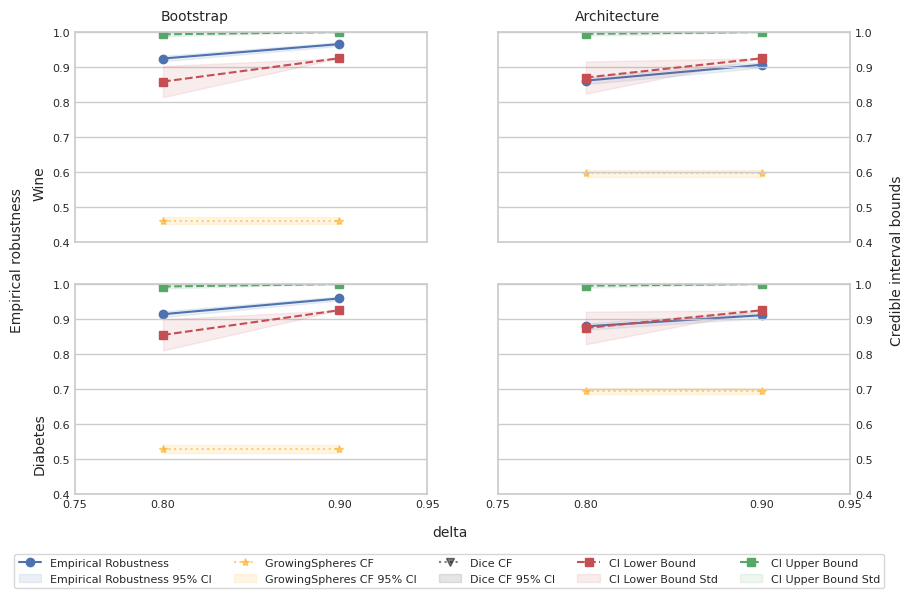

In [13]:
# Use only matplotlib 
# x-axis: delta_robsutness
# y-axis: empirical robustness
# twin y-axis: CI lower and upper bounds
# row: dataset
# col: experiment type

_tmp_df = nn_df.copy()

datasets = ['wine_quality', 'diabetes', 'fico', 'breast_cancer'][:2]
rename_Datasets = ['Wine', 'Diabetes', 'Heloc', 'Br. Cancer'][:2]

_tmp_df['dataset_name'] = _tmp_df['dataset_name'].replace(dict(zip(datasets, rename_Datasets)))
datasets = rename_Datasets

experiment_types = _tmp_df['experiment_type'].unique()
# Remove Seed from the experiment types
experiment_types = [x for x in experiment_types if 'Seed' not in x]
delta_robustness = _tmp_df['delta_robustness'].unique().tolist()
delta_robustness.sort()
# Set fontsize to 11
rows = max(2, len(datasets))
cols = max(2, len(experiment_types))


for method in ['GrowingSpheres']:
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(10, 6), sharex=True, sharey=True)
    
    for i, dataset in enumerate(datasets):
        for j, experiment_type in enumerate(experiment_types):
            _df_fil = _tmp_df[(_tmp_df['dataset_name'] == dataset) & (_tmp_df['experiment_type'] == experiment_type)]
            _df = _df_fil[_df_fil['base_cf_method'] == method]
            
            data = _df.groupby('delta_robustness')['robust_counterfactual_validity_model2'].mean()
            
            ax = axes[i, j]
            ax.plot(delta_robustness, data, marker='o', linestyle='-', color='b', label='Empirical Robustness')
            emprob_ci = 1.96 * _df.groupby('delta_robustness')['robust_counterfactual_validity_model2'].std() / np.sqrt(_df.groupby('delta_robustness')['robust_counterfactual_validity_model2'].count())
            ax.fill_between(delta_robustness, data - emprob_ci, data + emprob_ci, color='b', alpha=0.1, label='Empirical Robustness 95% CI')
            
            # ax.set_title(f'{dataset} \n{experiment_type}')
            
            
            data_lower = _df.groupby('delta_robustness')['lower_bound_beta'].mean()
            data_upper = _df.groupby('delta_robustness')['upper_bound_beta'].mean()
            
            ax2 = ax.twinx()
            
            ax2.plot(delta_robustness, data_lower, marker='s', linestyle='--', color='r', label='CI Lower Bound')
            # add yerr for lower bound
            lb_std = _df.groupby('delta_robustness')['lower_bound_beta'].std()
            ax2.fill_between(delta_robustness, data_lower - lb_std, data_lower + lb_std, color='r', alpha=0.1, label='CI Lower Bound Std')
            
            ax2.plot(delta_robustness, data_upper, marker='s', linestyle='--', color='g', label='CI Upper Bound')
            # add yerr
            ub_std = _df.groupby('delta_robustness')['upper_bound_beta'].std()
            ax2.fill_between(delta_robustness, data_upper - ub_std, data_upper + ub_std, color='g', alpha=0.1, label='CI Upper Bound Std')
            
            #Plot baseline
            linestyles = [':', ':']
            markers = ['*', 'v', 's']
            for k, (m, color) in enumerate(zip(['GrowingSpheres', 'Dice'], ['orange', 'black'])):
                __df = _df_fil[_df_fil['base_cf_method'] == m]
                base = __df['base_counterfactual_validity_model2'].mean()
                base_std = __df['base_counterfactual_validity_model2'].std()
                base_ci = 1.96 * base_std / np.sqrt(__df['base_counterfactual_validity_model2'].count())
                ax.plot(delta_robustness, [base] * len(delta_robustness), color=color, linestyle=linestyles[k], label=f'{m} CF', marker=markers[k], alpha=0.5)
                ax.fill_between(delta_robustness, base - base_ci, base + base_ci, color=color, alpha=0.1, label=f'{m} CF 95% CI')
            
            l = 0.4
            ax.set_ylim(l, 1)
            ax2.set_ylim(l, 1)
            ax.set_xticks([0.75, 0.8, 0.9, 0.95])
            ax.set_yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
            ax2.set_yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
                
            # Decrease font size of the labels
            ax.tick_params(axis='both', which='major', labelsize=10)
            ax2.tick_params(axis='both', which='major', labelsize=10)
            
            # Turn off label ticks for ax2 on the plots that are not on the right
            if j != len(experiment_types) - 1:
                ax2.set_yticklabels([])
                
            # Remove the outline of the plot
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            
            
            ax.tick_params(axis=u'both', which=u'both',length=0)
            ax2.tick_params(axis=u'both', which=u'both',length=0)
            
            # Change ticks fontsize
            ax.tick_params(axis='both', which='major', labelsize=8)
            ax2.tick_params(axis='both', which='major', labelsize=8)
            
            # Remove grid
            ax.grid(False)
            
            handles, labels = ax.get_legend_handles_labels()    
            handles_2, labels_2 = ax2.get_legend_handles_labels()
            
            handles_combined = handles + handles_2
            labels_combined = labels + labels_2
            
    fig.text(0.5, 0.04, 'delta', ha='center', fontsize=10)
    fig.text(0.06, 0.5, 'Empirical robustness', va='center', rotation='vertical', fontsize=10)  
    fig.text(0.94, 0.5, 'Credible interval bounds', va='center', rotation='vertical', fontsize=10)
    # Create one legend for the entire figure
    fig.legend(handles_combined, labels_combined,  bbox_to_anchor=(0.94, 0.02), ncol=5, fontsize=8)

    # Set titles for the rows with the dataset names
    for ax, row in zip(axes[:,0], datasets):
        rowlen = len(row)
        fig.text(ax.get_position().x0 - 0.035 , ax.get_position().y0 + 0.3 * (1/rowlen), row, ha='center', rotation='vertical', fontsize=10)

    # Set titles for the columns
    for ax, col in zip(axes[0], experiment_types):
        fig.text(ax.get_position().x0 + 0.12 , ax.get_position().y1 + 0.02, col, ha='center', fontsize=10)

            
    plt.savefig(f'{images_dir}/2_empirical_robustness_ci_bounds_{method}.png', dpi=300, bbox_inches='tight')

    # plt.tight_layout()
    plt.show()
    plt.close()
  

<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[3] Comparision to RobX</div>

In [14]:
robx_raw_df = pd.read_feather(f'{results_path}/robx_results.feather') 

In [15]:
robx_raw_df.head(3)

,base_cf_method,model_type_to_use,experiment_type,dataset_name,k_mlps_in_B,fold_i,experiment_generalization_type,beta_confidence,delta_robustness,model2_name,x_test_sample,y_test_sample,model1_pred_proba,model1_pred_crisp,model2_pred_proba,model2_pred_crisp,base_counterfactual,base_counterfactual_model1_pred_proba,base_counterfactual_model1_pred_crisp,base_counterfactual_model2_pred_proba,base_counterfactual_model2_pred_crisp,base_counterfactual_validity,base_counterfactual_proximityL1,base_counterfactual_proximityL2,base_counterfactual_plausibility,base_counterfactual_discriminative_power,base_counterfactual_validity_model2,base_counterfactual_time,robust_counterfactual,robust_counterfactual_model1_pred_proba,robust_counterfactual_model1_pred_crisp,robust_counterfactual_model2_pred_proba,robust_counterfactual_model2_pred_crisp,robust_counterfactual_validity,robust_counterfactual_proximityL1,robust_counterfactual_proximityL2,robust_counterfactual_plausibility,robust_counterfactual_discriminative_power,robust_counterfactual_validity_model2,robust_counterfactual_L1_distance_from_base_cf,robust_counterfactual_L2_distance_from_base_cf,robust_counterfactual_time,base_model
0,GrowingSpheres,lightgbm,Architecture,diabetes,32,1,Architecture,0.6,0.01,Model2_1,"[0.8823529411764706, 0.686868686868687, 0.5737...",1,0.271225,0,0.402319,0,"[0.8863627220700072, 0.7022243383605062, 0.580...",0.530565,1,0.529537,1,1,0.107689,0.058999,0.369783,0.666667,1,0.001753,"[0.9766030921988395, 0.7983178522345731, 0.588...",0.887257,1.0,0.792068,1.0,1.0,0.690253,0.305368,0.414046,0.733333,1.0,0.662129,0.084618,0.073809,NeuralNetwork
1,GrowingSpheres,lightgbm,Architecture,diabetes,32,1,Architecture,0.6,0.01,Model2_2,"[0.8823529411764706, 0.686868686868687, 0.5737...",1,0.271225,0,0.336196,0,"[0.8863627220700072, 0.7022243383605062, 0.580...",0.530565,1,0.475777,0,1,0.107689,0.058999,0.369783,0.666667,0,0.001753,"[0.9846492887916586, 0.8068859388106996, 0.588...",0.899963,1.0,0.841492,1.0,1.0,0.742550,0.330865,0.421250,0.733333,1.0,0.721168,0.100381,0.089651,NeuralNetwork
2,GrowingSpheres,lightgbm,Architecture,diabetes,32,1,Architecture,0.6,0.01,Model2_3,"[0.8823529411764706, 0.686868686868687, 0.5737...",1,0.271225,0,0.395699,0,"[0.8863627220700072, 0.7022243383605062, 0.580...",0.530565,1,0.535134,1,1,0.107689,0.058999,0.369783,0.666667,1,0.001753,"[0.9829436542129539, 0.8050696738749635, 0.588...",0.899963,1.0,0.821987,1.0,1.0,0.731464,0.325454,0.419629,0.733333,1.0,0.708653,0.096927,0.108603,NeuralNetwork


In [16]:
robx_raw_df.rename(columns={'beta_confidence': 'tau', 'delta_robustness': 'variance'}, inplace=True)

In [17]:
robx_nn_gs_df = robx_raw_df[(robx_raw_df['base_model'] == 'NeuralNetwork') & (robx_raw_df['base_cf_method'] == 'GrowingSpheres')]
robx_nn_dice_df = robx_raw_df[(robx_raw_df['base_model'] == 'NeuralNetwork') & (robx_raw_df['base_cf_method'] == 'Dice')]
robx_nn_df = robx_raw_df[robx_raw_df['base_model'] == 'NeuralNetwork']
robx_dt_gs_df = robx_raw_df[(robx_raw_df['base_model'] == 'DecisionTree') & (robx_raw_df['base_cf_method'] == 'GrowingSpheres')]
robx_dt_dice_df = robx_raw_df[(robx_raw_df['base_model'] == 'DecisionTree') & (robx_raw_df['base_cf_method'] == 'Dice')]
robx_dt_df = robx_raw_df[robx_raw_df['base_model'] == 'DecisionTree']

print(f'Lengths of the dataframes: NN GS: {len(robx_nn_gs_df)}, NN Dice: {len(robx_nn_dice_df)}, DT GS: {len(robx_dt_gs_df)}, DT Dice: {len(robx_dt_dice_df)}')

Lengths of the dataframes: NN GS: 255701, NN Dice: 0, DT GS: 0, DT Dice: 0


In [18]:
robx_nn_df['dataset_name'].value_counts()

diabetes         90000
breast_cancer    90000
wine_quality     39701
fico             36000
Name: dataset_name, dtype: int64

In [20]:
_robx_df = robx_nn_gs_df.copy().dropna()
_betarob_df = nn_gs_df.copy().dropna()
_method_df = nn_df.copy().dropna()

columns_to_keep = [
    'dataset_name',
    'experiment_type',
    'method_name',
    'robust_counterfactual_validity_model2',
    'robust_counterfactual_L1_distance_from_base_cf',
    'robust_counterfactual_proximityL1',
    'robust_counterfactual_plausibility',
    'robust_counterfactual_discriminative_power',
    'robust_counterfactual_time'
]

rename_names = [
    'Dataset',
    'Experiment Type',
    'Method',
    'Empirical Robustness',
    'Distance to Base',
    'Proximity L1',
    'Plausibility',
    'Discriminative Power',
    'Time (s)'

]

# Process the dataframes
_robx_df['method_name'] = 'RobX' + '(' + _robx_df['tau'].astype(str) + ',' + _robx_df['variance'].astype(str) + ')'
_robx_df = _robx_df[columns_to_keep].rename(columns=dict(zip(columns_to_keep, rename_names)))

_betarob_df['method_name'] = 'BetaRCE' + '(' + _betarob_df['delta_robustness'].astype(str) + ',' + _betarob_df['beta_confidence'].astype(str) + ')'
_betarob_df = _betarob_df[columns_to_keep].rename(columns=dict(zip(columns_to_keep, rename_names)))

_method_df['method_name'] = _method_df['base_cf_method']
_method_df = _method_df[columns_to_keep].rename(columns=dict(zip(columns_to_keep, rename_names)))
                                            
datasets = _robx_df['Dataset'].unique()
# Use Diabetes and Wine datasets only
datasets = ['diabetes', 'breast_cancer', 'fico', 'wine_quality']
experiment_types = _robx_df['Experiment Type'].unique()
# Remove Seed from the experiment types
experiment_types = [x for x in experiment_types if 'Seed' not in x]


# Filter 
_robx_df = _robx_df[_robx_df['Dataset'].isin(datasets)]
_betarob_df = _betarob_df[_betarob_df['Dataset'].isin(datasets)]
_method_df = _method_df[_method_df['Dataset'].isin(datasets)]

_robx_df = _robx_df[_robx_df['Experiment Type'].isin(experiment_types)]
_betarob_df = _betarob_df[_betarob_df['Experiment Type'].isin(experiment_types)]
_method_df = _method_df[_method_df['Experiment Type'].isin(experiment_types)]

In [21]:
metrics = [
    'Distance to Base', 
    'Proximity L1', 
    'Plausibility', 
    'Discriminative Power', 
    'Time (s)'
]

groupby = ['Dataset', 'Experiment Type', 'Method']
groupby_metrics = ['Dataset', 'Method']
keep_robx = ['RobX(0.5,0.01)', 'RobX(0.5,0.1)', 'RobX(0.6,0.01)', 'RobX(0.6,0.1)']
baselines = ['GrowingSpheres', 'Dice']
keepRCE = ['BetaRCE(0.6,0.95)', 'BetaRCE(0.7,0.95)', 'BetaRCE(0.8,0.95)', 'BetaRCE(0.9,0.95)']


# -- ROBX --
robx_grouped = _robx_df.groupby(groupby).mean(numeric_only=False)
robx_grouped = robx_grouped[robx_grouped.index.get_level_values('Method').isin(keep_robx)]
# Empirical
robx_grouped_emp = robx_grouped.unstack(level=-2)['Empirical Robustness']
# Metrics
robx_grouped_method = robx_grouped.groupby(groupby_metrics)[metrics].mean(numeric_only=False)
robx_grouped_method['Experiment Type'] = ['-'] * len(robx_grouped_method) 
robx_grouped_method = robx_grouped_method.set_index(['Experiment Type'], append=True)
robx_grouped_method = robx_grouped_method.reorder_levels([0,2,1])


# -- Baselines --
method_grouped = _method_df.groupby(groupby)
method_grouped = method_grouped.mean(numeric_only=False)
method_grouped = method_grouped[method_grouped.index.get_level_values('Method').isin(baselines)]
# Empirical
method_grouped_emp = method_grouped.unstack(level=-2)['Empirical Robustness']
# Metrics
method_grouped_method = method_grouped.groupby(groupby_metrics)[metrics].mean(numeric_only=False)
method_grouped_method['Experiment Type'] = ['-'] * len(method_grouped_method) 
method_grouped_method = method_grouped_method.set_index(['Experiment Type'], append=True)
method_grouped_method = method_grouped_method.reorder_levels([0,2,1])

# -- RCE -- 
rce_grouped = _betarob_df.groupby(groupby)
rce_grouped = rce_grouped.mean(numeric_only=False)
rce_grouped = rce_grouped[rce_grouped.index.get_level_values('Method').isin(keepRCE)]
# Empirical
rce_grouped_emp = rce_grouped.unstack(level=-2)['Empirical Robustness']
# Metrics 
rce_grouped_method = rce_grouped[metrics]
rce_grouped_method = rce_grouped_method.loc[(slice(None), slice(None), keepRCE), :]


# CONCAT
all_emp = pd.concat([method_grouped_emp, robx_grouped_emp, rce_grouped_emp]).sort_index(level=0, sort_remaining=False)
all_emp.to_csv(f'{images_dir}/all_emp.csv')
met_emp = pd.concat([method_grouped_method, robx_grouped_method, rce_grouped_method]).sort_index(level=0)
met_emp.to_csv(f'{images_dir}/all_met.csv')

/tmp/ipykernel_199010/4104993442.py:48: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  rce_grouped_method = rce_grouped_method.loc[(slice(None), slice(None), keepRCE), :]


In [22]:
all_emp

Experiment Type                  Architecture  Bootstrap
Dataset       Method                                    
breast_cancer GrowingSpheres         0.901333   0.928354
              RobX(0.5,0.01)         0.965111   0.878000
              RobX(0.5,0.1)          1.000000   0.997991
              RobX(0.6,0.01)         1.000000   0.966000
              RobX(0.6,0.1)          1.000000   0.999685
              BetaRCE(0.8,0.95)      0.888444   0.903586
              BetaRCE(0.9,0.95)      0.914222   0.953137
diabetes      GrowingSpheres         0.894889   0.936222
              RobX(0.5,0.01)         0.912000   0.889000
              RobX(0.5,0.1)          0.987873   0.967970
              RobX(0.6,0.01)         0.986667   0.970889
              RobX(0.6,0.1)          1.000000   0.979722
              BetaRCE(0.8,0.95)      0.878889   0.913778
              BetaRCE(0.9,0.95)      0.910889   0.958667
fico          GrowingSpheres         0.898778   0.915893
              RobX(0.5,0.01)              NaN   0.866444
              RobX(0.5,0.1)               NaN   0.984844
              RobX(0.6,0.01)              NaN   0.981778
              RobX(0.6,0.1)               NaN   0.986154
              BetaRCE(0.8,0.95)      0.874222   0.890608
              BetaRCE(0.9,0.95)      0.923333   0.942026
wine_quality  GrowingSpheres         0.883778   0.944778
              RobX(0.5,0.01)         0.994451   0.969556
              RobX(0.5,0.1)          1.000000   0.999730
              RobX(0.6,0.01)         1.000000   0.999111
              RobX(0.6,0.1)          1.000000   1.000000
              BetaRCE(0.8,0.95)      0.861111   0.924222
              BetaRCE(0.9,0.95)      0.906444   0.965333

In [23]:
met_emp.head(20)

Distance to Base  \
Dataset       Experiment Type Method                                
breast_cancer -               GrowingSpheres             3.973243   
                              RobX(0.5,0.01)             2.880268   
                              RobX(0.5,0.1)              4.945760   
                              RobX(0.6,0.01)             3.405536   
                              RobX(0.6,0.1)              5.607075   
              Architecture    BetaRCE(0.8,0.95)          2.624738   
                              BetaRCE(0.9,0.95)          3.510266   
              Bootstrap       BetaRCE(0.8,0.95)          4.027971   
                              BetaRCE(0.9,0.95)          5.730498   
diabetes      -               GrowingSpheres             0.537696   
                              RobX(0.5,0.01)             0.575799   
                              RobX(0.5,0.1)              0.990542   
                              RobX(0.6,0.01)             0.805321   
                              RobX(0.6,0.1)              1.268561   
              Architecture    BetaRCE(0.8,0.95)          0.351168   
                              BetaRCE(0.9,0.95)          0.432895   
              Bootstrap       BetaRCE(0.8,0.95)          0.575337   
                              BetaRCE(0.9,0.95)          0.791384   
fico          -               GrowingSpheres             3.164057   
                              RobX(0.5,0.01)             1.821653   

                                                 Proximity L1  Plausibility  \
Dataset       Experiment Type Method                                          
breast_cancer -               GrowingSpheres         5.096721      1.180442   
                              RobX(0.5,0.01)         3.214490      0.475224   
                              RobX(0.5,0.1)          5.100078      0.436445   
                              RobX(0.6,0.01)         3.593992      0.444904   
                              RobX(0.6,0.1)          5.749065      0.458048   
              Architecture    BetaRCE(0.8,0.95)      4.038888      1.007553   
                              BetaRCE(0.9,0.95)      4.711368      1.119024   
              Bootstrap       BetaRCE(0.8,0.95)      5.068681      1.168308   
                              BetaRCE(0.9,0.95)      6.568386      1.426960   
diabetes      -               GrowingSpheres         0.841865      0.376869   
                              RobX(0.5,0.01)         0.796068      0.282951   
                              RobX(0.5,0.1)          1.067992      0.275084   
                              RobX(0.6,0.01)         0.999350      0.286164   
                              RobX(0.6,0.1)          1.318699      0.262295   
              Architecture    BetaRCE(0.8,0.95)      0.666081      0.353919   
                              BetaRCE(0.9,0.95)      0.728836      0.361310   
              Bootstrap       BetaRCE(0.8,0.95)      0.895894      0.381076   
                              BetaRCE(0.9,0.95)      1.076649      0.411173   
fico          -               GrowingSpheres         3.568637      0.958394   
                              RobX(0.5,0.01)         1.979532      0.457844   

                                                 Discriminative Power  \
Dataset       Experiment Type Method                                    
breast_cancer -               GrowingSpheres                 0.403412   
                              RobX(0.5,0.01)                 0.728352   
                              RobX(0.5,0.1)                  0.981447   
                              RobX(0.6,0.01)                 0.835493   
                              RobX(0.6,0.1)                  0.998279   
              Architecture    BetaRCE(0.8,0.95)              0.290548   
                              BetaRCE(0.9,0.95)              0.354000   
              Bootstrap       BetaRCE(0.8,0.95)              0.409681   
                              BetaRCE(0.9,0.95)              

In [24]:
metrics = [
    'Distance to Base', 
    'Proximity L1', 
    'Plausibility', 
    'Discriminative Power', 
    'Time (s)'
]

groupby = ['Dataset', 'Experiment Type', 'Method']
groupby_metrics = ['Dataset', 'Method']
keep_robx = ['RobX(0.5,0.01)', 'RobX(0.5,0.1)', 'RobX(0.6,0.01)', 'RobX(0.6,0.1)']
baselines = ['GrowingSpheres', 'Dice']
keepRCE = ['BetaRCE(0.6,0.95)', 'BetaRCE(0.7,0.95)', 'BetaRCE(0.8,0.95)', 'BetaRCE(0.9,0.95)']


# -- ROBX --
robx_grouped = _robx_df.groupby(groupby)
robx_grouped = robx_grouped.std(numeric_only=False) / np.sqrt(robx_grouped.count())
robx_grouped = robx_grouped[robx_grouped.index.get_level_values('Method').isin(keep_robx)]
# Empirical
robx_grouped_emp = robx_grouped.unstack(level=-2)['Empirical Robustness']
# Metrics
robx_grouped_method = robx_grouped.groupby(groupby_metrics)[metrics]
robx_grouped_method = robx_grouped_method.std(numeric_only=False) / np.sqrt(robx_grouped_method.count())
robx_grouped_method['Experiment Type'] = ['-'] * len(robx_grouped_method) 
robx_grouped_method = robx_grouped_method.set_index(['Experiment Type'], append=True)
robx_grouped_method = robx_grouped_method.reorder_levels([0,2,1])


# -- Baselines --
method_grouped = _method_df.groupby(groupby)
method_grouped = method_grouped.std(numeric_only=False) / np.sqrt(method_grouped.count())
method_grouped = method_grouped[method_grouped.index.get_level_values('Method').isin(baselines)]
# Empirical
method_grouped_emp = method_grouped.unstack(level=-2)['Empirical Robustness']
# Metrics
method_grouped_method = method_grouped.groupby(groupby_metrics)[metrics]
method_grouped_method = method_grouped_method.std(numeric_only=False) / np.sqrt(method_grouped_method.count())
method_grouped_method['Experiment Type'] = ['-'] * len(method_grouped_method) 
method_grouped_method = method_grouped_method.set_index(['Experiment Type'], append=True)
method_grouped_method = method_grouped_method.reorder_levels([0,2,1])

# -- RCE -- 
rce_grouped = _betarob_df.groupby(groupby)
rce_grouped = rce_grouped.std(numeric_only=False) / np.sqrt(rce_grouped.count())
rce_grouped = rce_grouped[rce_grouped.index.get_level_values('Method').isin(keepRCE)]
# Empirical
rce_grouped_emp = rce_grouped.unstack(level=-2)['Empirical Robustness']
# Metrics 
rce_grouped_method = rce_grouped[metrics]
rce_grouped_method = rce_grouped_method.loc[(slice(None), slice(None), keepRCE), :]


# CONCAT
all_emp_std = pd.concat([method_grouped_emp, robx_grouped_emp, rce_grouped_emp]).sort_index(level=0, sort_remaining=False)
all_emp_std.to_csv(f'{images_dir}/all_emp_std.csv')
met_emp_std = pd.concat([method_grouped_method, robx_grouped_method, rce_grouped_method]).sort_index(level=0)
met_emp_std.to_csv(f'{images_dir}/all_met_std.csv')

/tmp/ipykernel_199010/1333525197.py:51: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  rce_grouped_method = rce_grouped_method.loc[(slice(None), slice(None), keepRCE), :]


In [26]:
all_comprehensive = all_emp.round(3).astype(str) + ' +- ' + all_emp_std.round(3).astype(str) 
all_comprehensive.to_csv(f'{images_dir}/all_with_se.csv')
all_comprehensive

Experiment Type                    Architecture       Bootstrap
Dataset       Method                                           
breast_cancer GrowingSpheres     0.901 +- 0.003  0.928 +- 0.003
              RobX(0.5,0.01)     0.965 +- 0.003  0.878 +- 0.003
              RobX(0.5,0.1)          1.0 +- 0.0    0.998 +- 0.0
              RobX(0.6,0.01)         1.0 +- 0.0  0.966 +- 0.002
              RobX(0.6,0.1)          1.0 +- 0.0      1.0 +- 0.0
              BetaRCE(0.8,0.95)  0.888 +- 0.005  0.904 +- 0.004
              BetaRCE(0.9,0.95)  0.914 +- 0.004  0.953 +- 0.003
diabetes      GrowingSpheres     0.895 +- 0.003  0.936 +- 0.003
              RobX(0.5,0.01)     0.912 +- 0.004  0.889 +- 0.003
              RobX(0.5,0.1)      0.988 +- 0.002  0.968 +- 0.003
              RobX(0.6,0.01)     0.987 +- 0.002  0.971 +- 0.002
              RobX(0.6,0.1)          1.0 +- 0.0   0.98 +- 0.002
              BetaRCE(0.8,0.95)  0.879 +- 0.005  0.914 +- 0.004
              BetaRCE(0.9,0.95)  0.911 +- 0.004  0.959 +- 0.003
fico          GrowingSpheres     0.899 +- 0.003  0.916 +- 0.003
              RobX(0.5,0.01)         nan +- nan  0.866 +- 0.005
              RobX(0.5,0.1)          nan +- nan  0.985 +- 0.002
              RobX(0.6,0.01)         nan +- nan  0.982 +- 0.002
              RobX(0.6,0.1)          nan +- nan  0.986 +- 0.005
              BetaRCE(0.8,0.95)  0.874 +- 0.005  0.891 +- 0.005
              BetaRCE(0.9,0.95)  0.923 +- 0.004  0.942 +- 0.003
wine_quality  GrowingSpheres     0.884 +- 0.003  0.945 +- 0.002
              RobX(0.5,0.01)     0.994 +- 0.002   0.97 +- 0.003
              RobX(0.5,0.1)          1.0 +- 0.0      1.0 +- 0.0
              RobX(0.6,0.01)         1.0 +- 0.0    0.999 +- 0.0
              RobX(0.6,0.1)          1.0 +- 0.0      1.0 +- 0.0
              BetaRCE(0.8,0.95)  0.861 +- 0.005  0.924 +- 0.004
              BetaRCE(0.9,0.95)  0.906 +- 0.004  0.965 +- 0.003

In [27]:
all_metrics_comprehensive = met_emp.round(3).astype(str) + ' +- ' + met_emp_std.round(3).astype(str) 
all_metrics_comprehensive.to_csv(f'{images_dir}/all_metrics_with_se.csv')
all_metrics_comprehensive.head(50)

Distance to Base  \
Dataset       Experiment Type Method                               
breast_cancer -               GrowingSpheres        3.973 +- 0.0   
                              RobX(0.5,0.01)       2.88 +- 0.003   
                              RobX(0.5,0.1)       4.946 +- 0.002   
                              RobX(0.6,0.01)      3.406 +- 0.003   
                              RobX(0.6,0.1)       5.607 +- 0.003   
              Architecture    BetaRCE(0.8,0.95)   2.625 +- 0.037   
                              BetaRCE(0.9,0.95)    3.51 +- 0.048   
              Bootstrap       BetaRCE(0.8,0.95)   4.028 +- 0.032   
                              BetaRCE(0.9,0.95)    5.73 +- 0.047   
diabetes      -               GrowingSpheres      0.538 +- 0.001   
                              RobX(0.5,0.01)      0.576 +- 0.001   
                              RobX(0.5,0.1)       0.991 +- 0.002   
                              RobX(0.6,0.01)      0.805 +- 0.001   
                              RobX(0.6,0.1)       1.269 +- 0.002   
              Architecture    BetaRCE(0.8,0.95)   0.351 +- 0.006   
                              BetaRCE(0.9,0.95)   0.433 +- 0.006   
              Bootstrap       BetaRCE(0.8,0.95)   0.575 +- 0.006   
                              BetaRCE(0.9,0.95)   0.791 +- 0.009   
fico          -               GrowingSpheres      3.164 +- 0.018   
                              RobX(0.5,0.01)        1.822 +- nan   
                              RobX(0.5,0.1)         3.762 +- nan   
                              RobX(0.6,0.01)        2.573 +- nan   
                              RobX(0.6,0.1)         3.409 +- nan   
              Architecture    BetaRCE(0.8,0.95)   1.548 +- 0.018   
                              BetaRCE(0.9,0.95)   2.117 +- 0.023   
              Bootstrap       BetaRCE(0.8,0.95)   3.172 +- 0.036   
                              BetaRCE(0.9,0.95)    5.864 +- 0.09   
wine_quality  -               GrowingSpheres        0.406 +- 0.0   
                              RobX(0.5,0.01)      0.552 +- 0.001   
                              RobX(0.5,0.1)       0.977 +- 0.001   
                              RobX(0.6,0.01)      0.719 +- 0.001   
                              RobX(0.6,0.1)       1.271 +- 0.001   
              Architecture    BetaRCE(0.8,0.95)   0.257 +- 0.003   
                              BetaRCE(0.9,0.95)   0.367 +- 0.004   
              Bootstrap       BetaRCE(0.8,0.95)   0.425 +- 0.005   
                              BetaRCE(0.9,0.95)   0.578 +- 0.006   

                                                   Proximity L1  \
Dataset       Experiment Type Method                              
breast_cancer -               GrowingSpheres       5.097 +- 0.0   
                              RobX(0.5,0.01)     3.214 +- 0.002   
                              RobX(0.5,0.1)        5.1 +- 0.001   
                              RobX(0.6,0.01)     3.594 +- 0.002   
                              RobX(0.6,0.1)      5.749 +- 0.002   
              Architecture    BetaRCE(0.8,0.95)   4.039 +- 0.04   
                              BetaRCE(0.9,0.95)  4.711 +- 0.049   
              Bootstrap       BetaRCE(0.8,0.95)  5.069 +- 0.036   
                              BetaRCE(0.9,0.95)   6.568 +- 0.05   
diabetes      -               GrowingSpheres     0.842 +- 0.001   
                              RobX(0.5,0.01)     0.796 +- 0.001   
                              RobX(0.5,0.1)      1.068 +- 0.002   
                              RobX(0.6,0.01)     0.999 +- 0.001   
                              RobX(0.6,0.1)      1.319 +- 0.002   
              Architecture    BetaRCE(0.8,0.95)  0.666 +- 0.007   
                              BetaRCE(0.9,0.95)  0.729 +- 0.008   
              Bootstrap       BetaRCE(0.8,0.95)  0.896 +- 0.008   
                              BetaRCE(0.9,0.95)   1.077 +- 0.01   
fico          -               GrowingSpheres     3.569 +- 0.017   
                              RobX(0.5,0.01)        1.98

Histograms with distance

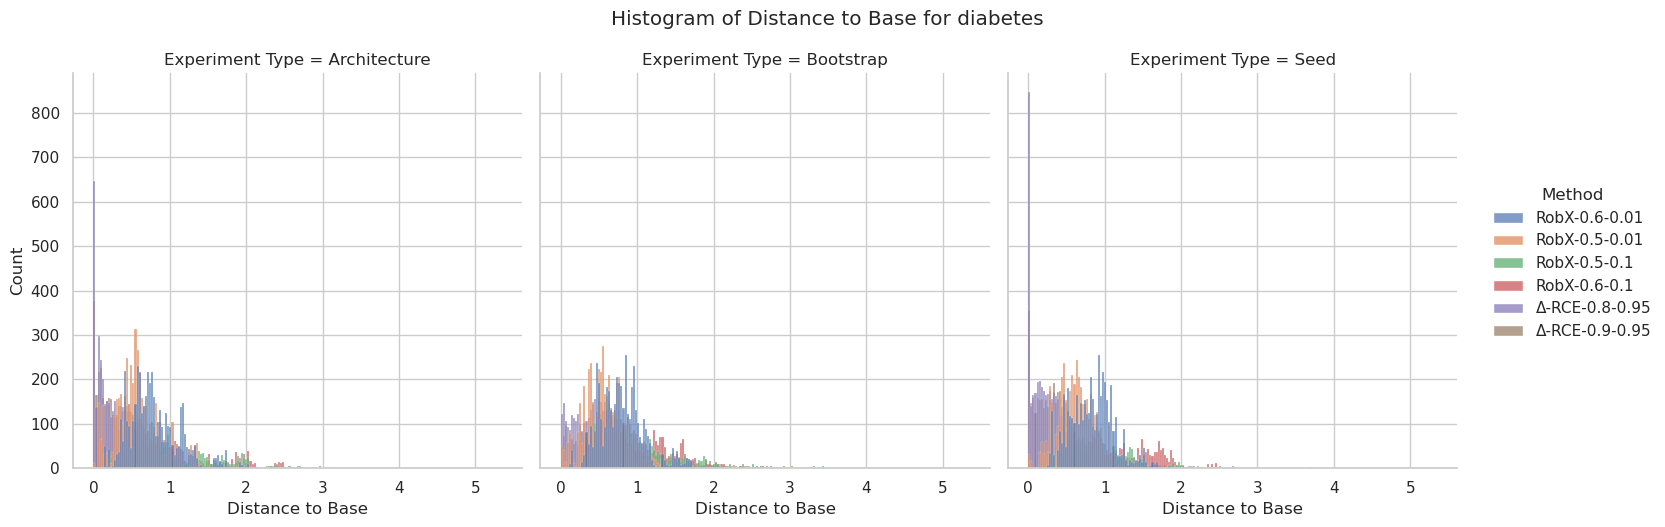

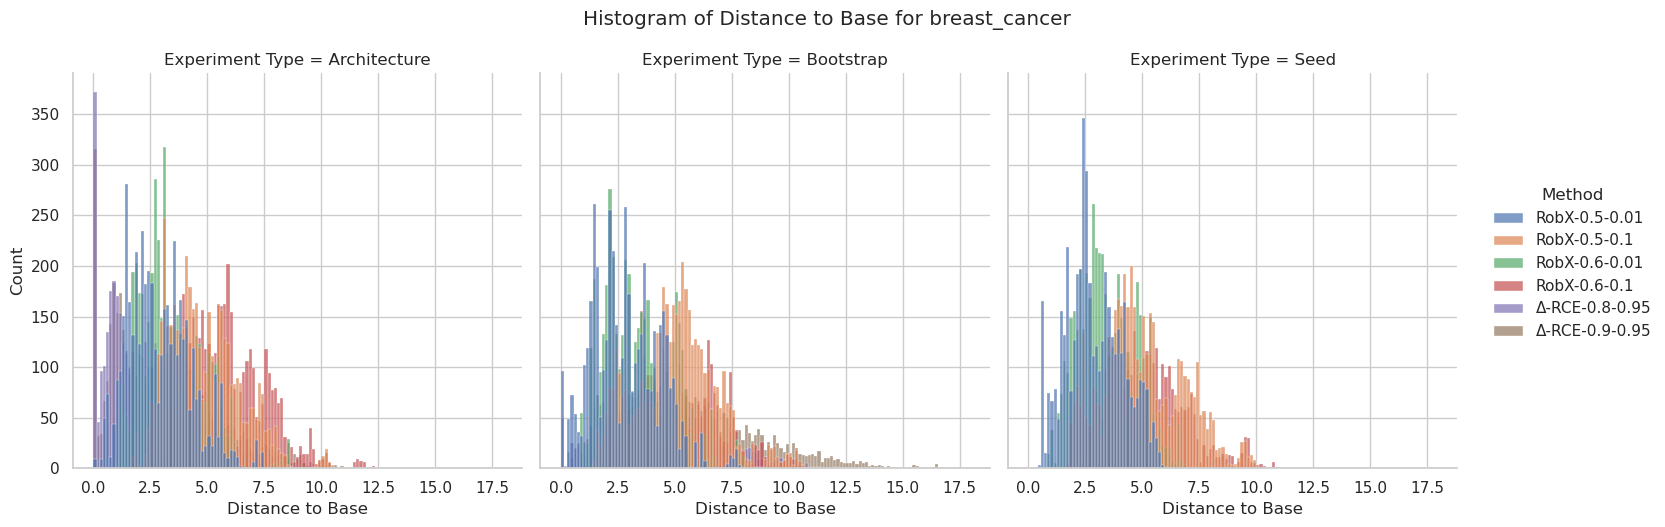

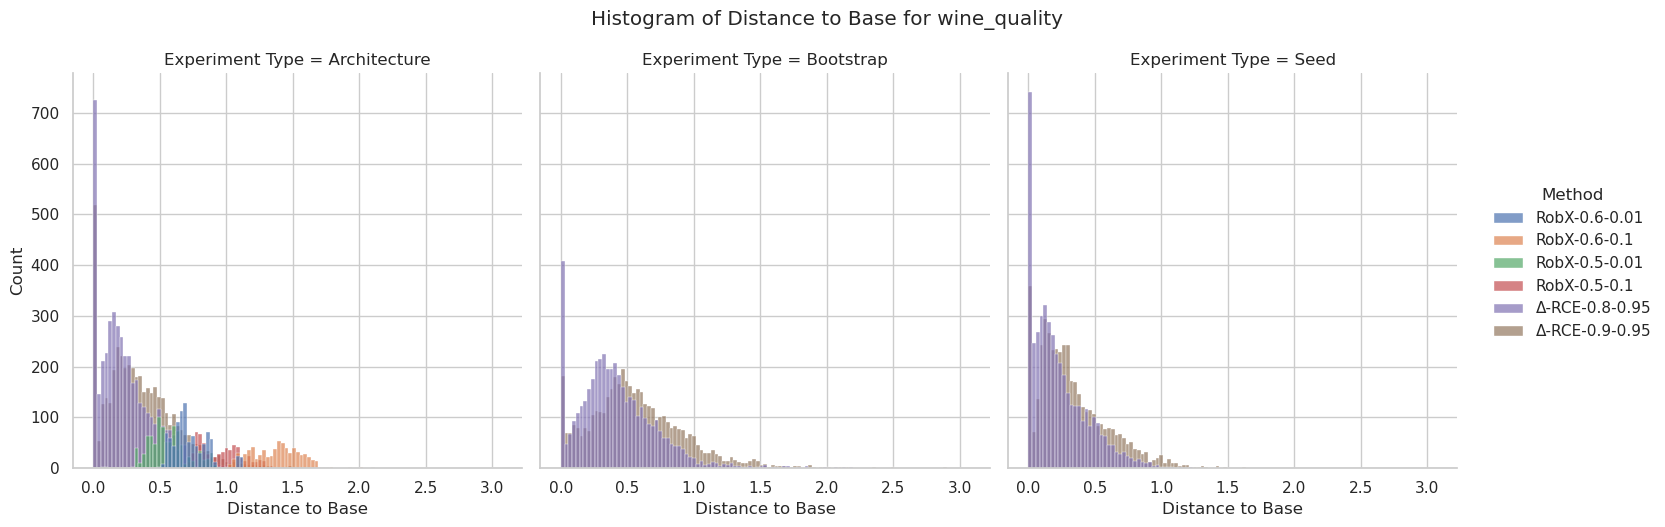

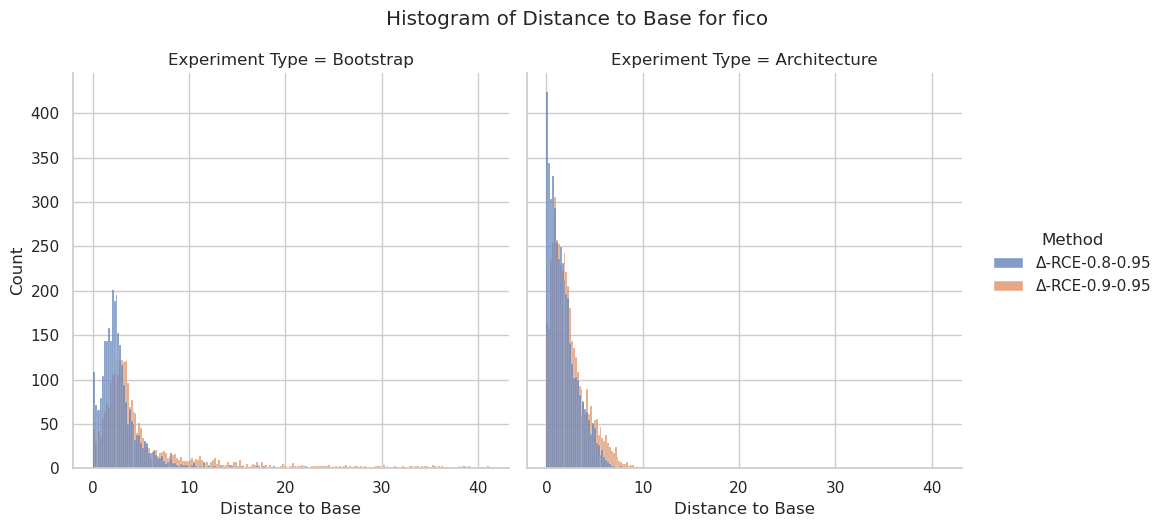

In [40]:

# methods_to_use = ['RobX-0.5-0.01','RobX-0.5-0.1', '\u0394-RCE-0.8-0.95', '\u0394-RCE-0.9-0.95', 'GrowingSpheres', 'Dice']
methods_to_use = ['RobX-0.5-0.01','RobX-0.5-0.1', 'RobX-0.6-0.01','RobX-0.6-0.1', '\u0394-RCE-0.8-0.95', '\u0394-RCE-0.9-0.95']

tmp_rce = nn_gs_df.copy().dropna()
tmp_rce['Method'] = '\u0394-RCE' + '-' + tmp_rce['delta_robustness'].astype(str) + '-' + tmp_rce['beta_confidence'].astype(str)

tmp_robx = robx_nn_gs_df.copy().dropna()
tmp_robx['Method'] = 'RobX' + '-' + tmp_robx['tau'].astype(str) + '-' + tmp_robx['variance'].astype(str)

tmp = pd.concat([tmp_robx, tmp_rce], axis=0, ignore_index=True)

columns={
    'robust_counterfactual_validity_model2': 'Empirical Robustness',
    'robust_counterfactual_L1_distance_from_base_cf': 'Distance to Base',
    'robust_counterfactual_proximityL1': 'Proximity L1',
    'robust_counterfactual_plausibility': 'Plausibility',
    'robust_counterfactual_discriminative_power': 'Discriminative Power',
    'dataset_name': 'Dataset',
    'experiment_type': 'Experiment Type',
    'Method': 'Method',
}


column = 'Distance to Base'
color_by = 'Method'


tmp = tmp.rename(columns=columns)
tmp = tmp[list(columns.values())]
tmp = tmp[tmp['Method'].isin(methods_to_use)]



for dataset in tmp['Dataset'].unique():
    _tmp = tmp[tmp['Dataset'] == dataset]
    # tmp = tmp[tmp['Experiment Type'] == experiment_type]
    sns.displot(data=_tmp, x=column, hue=color_by, kind='hist', alpha=0.7, col='Experiment Type')
    plt.suptitle(f'Histogram of {column} for {dataset}', x=0.5, y=1.05)
    plt.savefig(f'{images_dir}/histogram_{column}_{dataset}.png', dpi=300, bbox_inches='tight')



<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[5] Time</div>

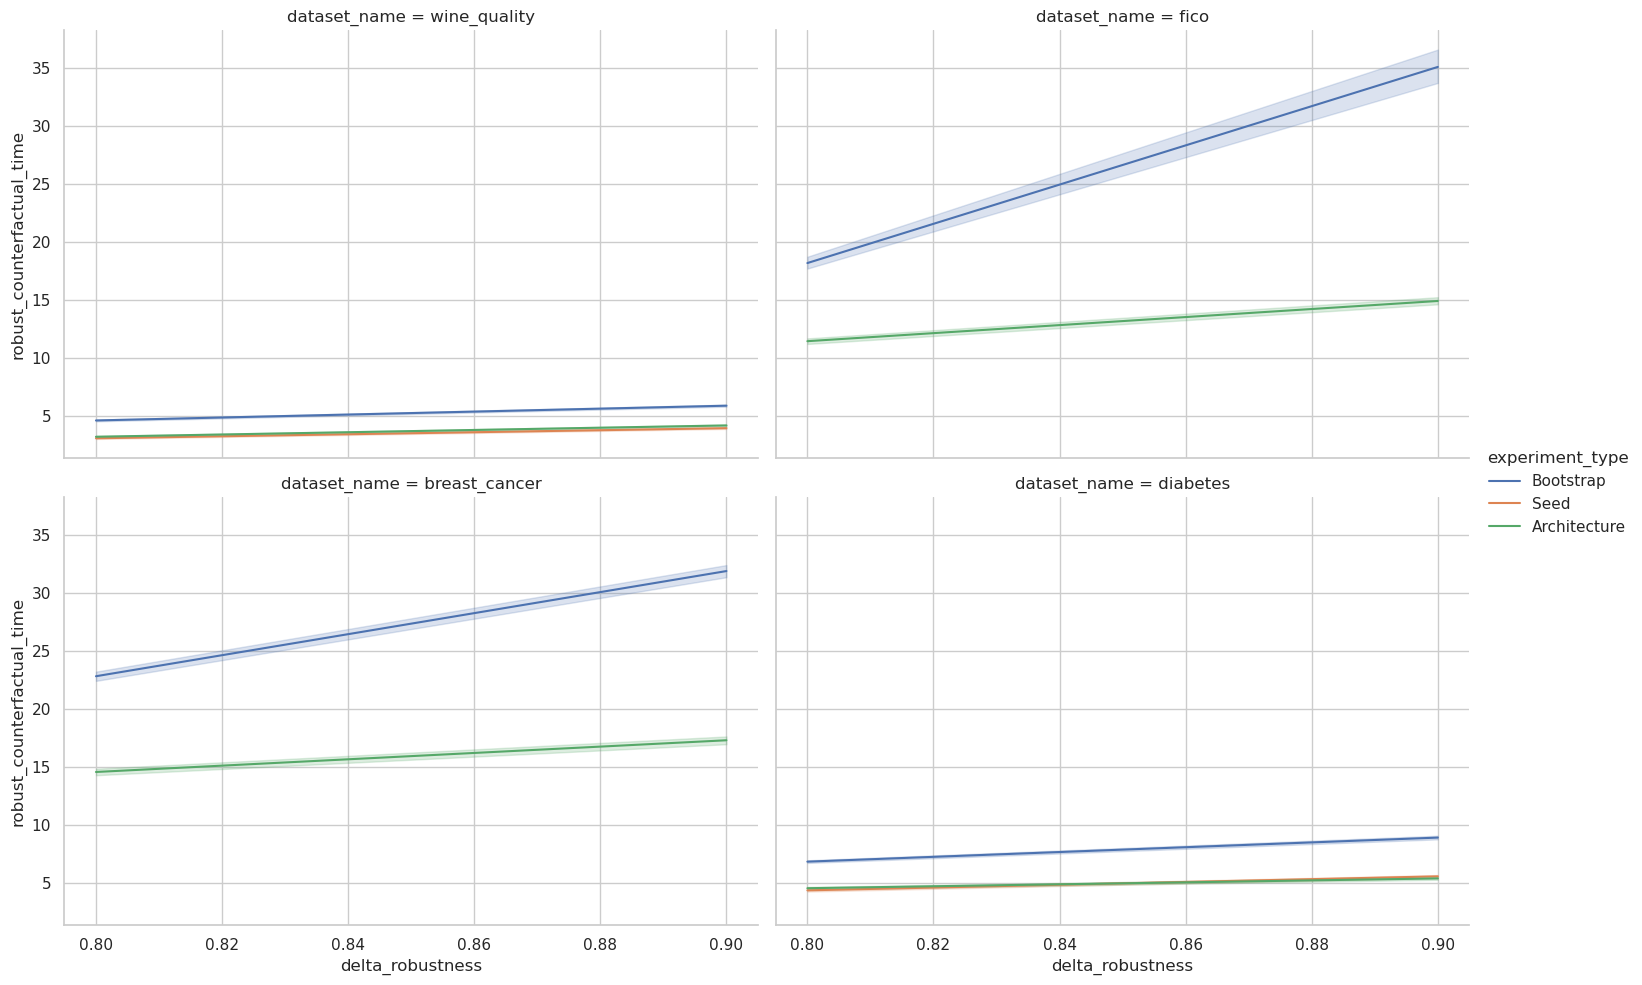

In [41]:
sns.relplot(data=nn_gs_df, x='delta_robustness', y='robust_counterfactual_time', hue='experiment_type', col='dataset_name', kind='line', height=5, aspect=1.5, col_wrap=2)
# plt.xlabel('Delta Robustness')
# plt.ylabel('Robust CF generation time (s)')
plt.savefig(f'{images_dir}/5_1_robust_cf_generation_time_delta.png', dpi=300, bbox_inches='tight')

In [42]:
# Create a scatterplot time vs empirical robustness
cutoff_up = 0.8
cutoff_low = 0.2
exp = 'Seed'

# Print average time for each experiment type
print('BetaROB Time')
tmp_beta = raw_df[raw_df['experiment_type'] == exp] 
quantile80 = tmp_beta['robust_counterfactual_time'].quantile(cutoff_up)
quantile20 = tmp_beta['robust_counterfactual_time'].quantile(cutoff_low)
tmp_beta = tmp_beta[tmp_beta['robust_counterfactual_time'] < quantile80]
tmp_beta = tmp_beta[tmp_beta['robust_counterfactual_time'] > quantile20]
print(tmp_beta.groupby(['experiment_type', 'dataset_name'])['robust_counterfactual_time'].mean().sort_index())

print('RobX Time')
tmp_robx = robx_raw_df[robx_raw_df['experiment_type'] == exp]
quantile80 = tmp_robx['robust_counterfactual_time'].quantile(cutoff_up)
quantile20 = tmp_robx['robust_counterfactual_time'].quantile(cutoff_low)
tmp_robx = tmp_robx[tmp_robx['robust_counterfactual_time'] < quantile80]
tmp_robx = tmp_robx[tmp_robx['robust_counterfactual_time'] > quantile20]
print(tmp_robx.groupby(['experiment_type', 'dataset_name'])['robust_counterfactual_time'].mean().sort_index())

print('Base CF Time')
tmp_base = raw_df[raw_df['experiment_type'] == exp]
quntile80 = tmp_base['base_counterfactual_time'].quantile(cutoff_up)
quantile20 = tmp_base['base_counterfactual_time'].quantile(cutoff_low)
tmp_base = tmp_base[tmp_base['base_counterfactual_time'] < quantile80]
tmp_base = tmp_base[tmp_base['base_counterfactual_time'] > quantile20]
print(tmp_base.groupby(['experiment_type', 'dataset_name'])['base_counterfactual_time'].mean().sort_index())

BetaROB Time
experiment_type  dataset_name
Seed             diabetes        4.034159
                 wine_quality    3.339416
Name: robust_counterfactual_time, dtype: float64
RobX Time
experiment_type  dataset_name 
Seed             breast_cancer    0.166705
                 diabetes         0.151601
Name: robust_counterfactual_time, dtype: float64
Base CF Time
experiment_type  dataset_name
Seed             diabetes        0.003503
                 wine_quality    0.002666
Name: base_counterfactual_time, dtype: float64
